In [4]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from cv2.ximgproc.segmentation import createSelectiveSearchSegmentation
from tensorflow.keras.models import load_model

In [5]:



MODEL_PATH_1 = '../data/traffic_data_model_4k_imgs_25_epoch.h5'
MODEL_PATH_2 = '../data/traffic_data_model_8k_imgs_25_epoch.h5'
MODEL_PATH_3 = '../data/traffic_data_model_with_bg.h5'
MODEL_PATH_4 = '../data/traffic_data_model_with_crop_img_&_bg.h5'
model = load_model(MODEL_PATH_4)

In [6]:
def nms(boxes, probs=None, overlap_lim=0.3):
    """
    No maximum suppression function
    boxes: predicted_boxes
    probs: probability of prediction
    """

    if len(boxes) == 0:
        return []

    boxidx = []

    x1_ = boxes[:, 0]
    y1_ = boxes[:, 1]
    x2_ = boxes[:, 2]
    y2_ = boxes[:, 3]

    area = (x2_ - x1_ + 1) * (y2_ - y1_ + 1)
    idxs = y2_

    if probs is not None:
        idxs = probs

    idxs = np.argsort(idxs)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        boxidx.append(i)

        x1__ = np.maximum(x1_[i], x1_[boxidx[:last]])
        y1__ = np.maximum(y1_[i], y1_[boxidx[:last]])
        x2__ = np.minimum(x2_[i], x2_[boxidx[:last]])
        y2__ = np.minimum(y2_[i], y2_[boxidx[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, x2__ - x1__ + 1)
        h = np.maximum(0, y2__ - y1__ + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have overlap greater
        # than the provided overlap threshold
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlap_lim)[0])))

    return boxes[boxidx].astype("int")

# load image

In [103]:
TEST_IMG_PATH = '../data/../data/export/1478020197691441017_jpg.rf.khBP6OhYCkK6dSIOqupU.jpg'
test_img = Image.open(TEST_IMG_PATH)
test_img = test_img.resize((224, 224))
test_img = np.array(test_img)

test_img = np.array(test_img, dtype='float32') / 255.0


# plt.figure(figsize=(5,5))
# plt.imshow(test_img)
# # plt.axis('off')
# plt.show()

In [104]:
test_img = np.array([test_img])
test_img.shape

(1, 224, 224, 3)

# getting selective search regions coodinates

In [105]:
# %%time
# ss = createSelectiveSearchSegmentation()
# ss.setBaseImage(test_img)
# ss.switchToSelectiveSearchFast()

In [106]:
# %%time
# ss_boxes = ss.process()

# pre-processing the region of intresetes

In [107]:
# MAX_PROPOSALS = 30
# MODEL_DIMS = 224

In [108]:
# ss_boxes.shape

In [109]:
# temp_boxes = []
# for i in ss_boxes:
#     if i[2] >= 100 and i[3] >= 100:
#         temp_boxes.append(i)

In [110]:
# rois = []
# bboxes = []
#
# for (x, y, w, h) in temp_boxes[:MAX_PROPOSALS]:
#     roi = test_img[y:y+h, x:x+w]
#     roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
#     roi.resize((224, 224, 3))
#     print(roi.shape)
#
#     rois.append(roi)
#     bboxes.append((x, y, x+w, y+h))
#     # break

In [111]:
# rois[0].shape

In [112]:
# for roi in rois:
#     roi = np.arary(roi, d
#     plt.figure(figsize=(10, 10))
#     plt.imshow(roi)
#     plt.show()

In [113]:
# rois = np.array(rois, dtype='float32') / 255.0
# bboxes = np.array(bboxes, dtype='int')

preds = model.predict(test_img)

1/1 [==============================] - 1s 548ms/step


In [114]:
preds

[array([[0.67723304, 0.21540819, 0.97001684, 0.73906314]], dtype=float32),
 array([[2.6940726e-02, 1.6253383e-03, 7.1319205e-06, 9.2464825e-06,
         9.2324251e-01, 7.4380558e-05, 4.1808445e-02, 1.4741768e-06,
         6.3697735e-07, 6.2901326e-03]], dtype=float32)]

In [115]:
preds[1]

array([[2.6940726e-02, 1.6253383e-03, 7.1319205e-06, 9.2464825e-06,
        9.2324251e-01, 7.4380558e-05, 4.1808445e-02, 1.4741768e-06,
        6.3697735e-07, 6.2901326e-03]], dtype=float32)

In [116]:
coods = preds[0]
classes = preds[1]

In [117]:
coods

array([[0.67723304, 0.21540819, 0.97001684, 0.73906314]], dtype=float32)

In [118]:
classes

array([[2.6940726e-02, 1.6253383e-03, 7.1319205e-06, 9.2464825e-06,
        9.2324251e-01, 7.4380558e-05, 4.1808445e-02, 1.4741768e-06,
        6.3697735e-07, 6.2901326e-03]], dtype=float32)

In [119]:
pred_labels = []
for cls in classes:
    pred_labels.append(np.where(cls == np.amax(cls))[0][0])


print(pred_labels)
# labels = np.where(preds[1][0] == np.amax(preds[1][0]))[0][0]
# labels

[4]


In [120]:
labels = {
    1:'car',
    2:'pedestrian',
    3:'trafficLight-Red',
    4:'trafficLight-Green',
    5:'truck',
    6:'trafficLight',
    7:'biker',
    8:'trafficLight-Yellow',
    9:'trafficLight-YellowLeft',
    10:'background'
}
class_ids = {
    'car':1,
    'pedestrian':2,
    'trafficLight-Red':3,
    'trafficLight-Green':4,
    'truck':5,
    'trafficLight':6,
    'biker':7,
    'trafficLight-Yellow':8,
    'trafficLight-YellowLeft':9,
    'background':10
}

In [121]:
for pred_label in pred_labels:
    print(labels[pred_label+1])

truck


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


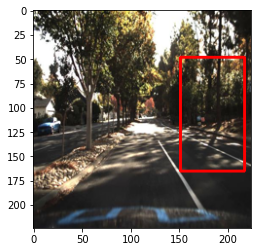

Text(0.5, 1.0, 'truck')

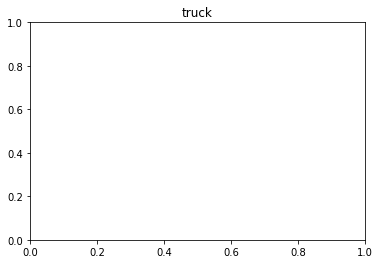

In [122]:
x1_ = int(coods[0][0]*224)
y1_ = int(coods[0][1]*224)
x2_ = int(coods[0][2]*224)
y2_ = int(coods[0][3]*224)
test_img = test_img[0]
cv2.rectangle(test_img, (x1_, y1_), (x2_, y2_), (255, 0, 0), 2)
plt.imshow(test_img)
plt.show()
plt.title(f'{labels[pred_labels[0]+1]}')

/var/folders/3m/06xcwnxd0mgg6vpyd5jknxk40000gn/T/ipykernel_8793/154189722.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


ValueError: Image size of 73188x162032 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 134010x231069 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 238914x144093 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 208782x174535 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 64232x106585 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 3996x171817 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 82674x169642 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 65348x102779 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

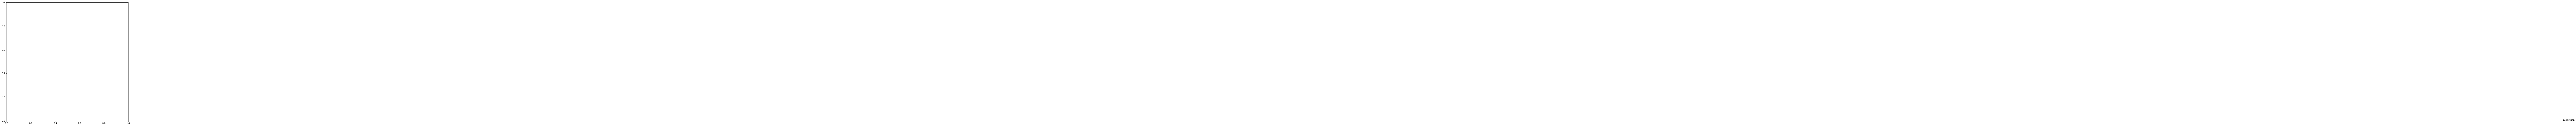

ValueError: Image size of 105552x32655 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 14570x82666 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 1736x91364 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 7344x214217 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 70956x163663 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 9548x77774 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 12924x126698 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

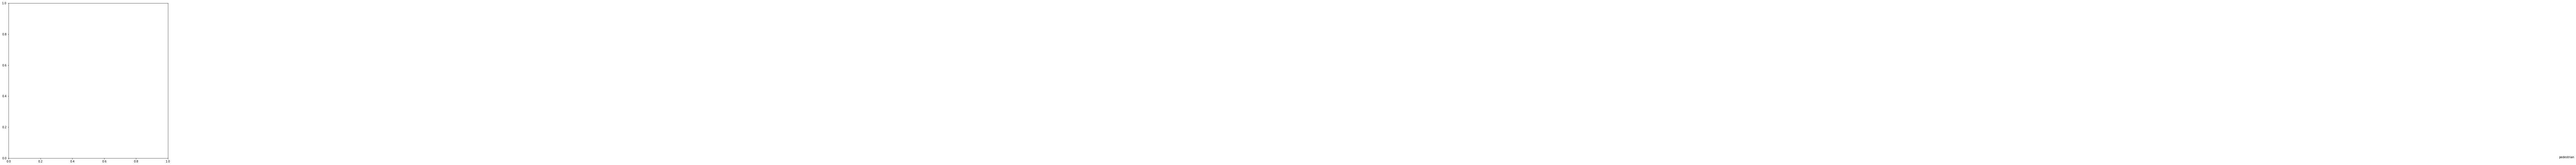

ValueError: Image size of 5642x72881 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 86022x175622 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 79298x145724 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 9548x109303 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 5112x78317 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 648x75056 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 57006x172904 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 18504x72881 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 222146x138113 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 223253x106585 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

ValueError: Image size of 86022x162575 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

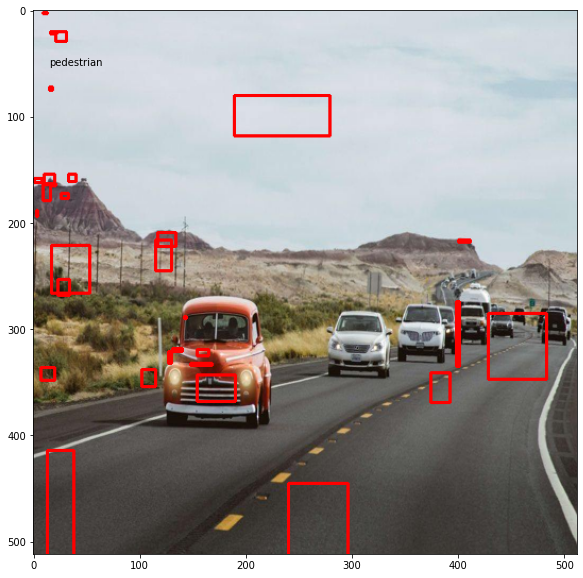

In [57]:
# for i in range(len(pred_labels)):
#     temp_img = Image.open(TEST_IMG_PATH)
#     temp_img = temp_img.resize((512, 512))
#     temp_img = np.array(temp_img)
#
#     w = bboxes[i][2] - bboxes[i][0]
#     h = bboxes[i][3] - bboxes[i][1]
#
#     x1_ = int(bboxes[i][0]+coods[i][0] * ss_boxes[i][2])
#     y1_ = int(bboxes[i][1]+coods[i][1] * ss_boxes[i][3])
#     x2_ = int(bboxes[i][0]+coods[i][2] * ss_boxes[i][2])
#     y2_ = int(bboxes[i][1]+coods[i][3] * ss_boxes[i][3])
#     cv2.rectangle(test_img, (x1_, y1_), (x2_, y2_), (255, 0, 0), 2)
#     # plt.figure(figsize=(10, 10))
#     # plt.text(x1_, y1_ - 20, labels[pred_labels[i]+1], fontsize='medium')
#     # plt.imshow(test_img)
#     # plt.show()
#
#
#     # plt.subplot(1, 2, 2)
#     # # print(meta_data[meta_data.ClassId == pred_labels[i]].Path)
#     # # pred_class_img_path = list(meta_data[meta_data.ClassId == pred_labels[i]].Path)[0]
#     # plt.imshow(Image.open(META_DATA_PATH + '/' + pred_class_img_path))
#
#
#
# plt.imshow(test_img)
# plt.show()